# **SSC0957 - Prática em Ciência de Dados II**
---

### **Alunos:**
> #### Arthur Santorum Lorenzetto - 12559465
> #### André Guarnier De Mitri    - 11395579
> #### Rui Emanuel Lima Vieira    - 11819182

### **Professor:** Alexandre Claudio Botazzo Delbem
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import scikit_posthocs as sp
from scipy import stats

In [2]:
df = pd.read_parquet('Dados/obitos_raca_cor.parquet', engine='pyarrow')
df

,codigo_ibge,nome_munic,nome_drs,obito,raca_cor,idade,cs_sexo,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,pneumopatia,puerpera,sindrome_de_down
0,3500303.0,Aguaí,São João da Boa Vista,False,None,41.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
1,3555000.0,Tupã,Marília,False,PARDA,31.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
2,3534401.0,Osasco,Grande SP Oeste,False,PARDA,32.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
3,3548708.0,São Bernardo do Campo,Grande SP Sudeste,False,PARDA,41.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
4,3557006.0,Votorantim,Sorocaba,False,BRANCA,44.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856220,3504107.0,Atibaia,Campinas,False,BRANCA,65.0,feminino,NaN,1.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
2856221,3552205.0,Sorocaba,Sorocaba,False,BRANCA,37.0,masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2856222,3554102.0,Taubaté,Taubaté,False,BRANCA,68.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
2856223,3506003.0,Bauru,Bauru,False,None,62.0,masculino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN


In [3]:
import pandas as pd

# Supondo que 'obitos_raca_cor' seja o seu DataFrame
# Substitua 'obitos_raca_cor' pelo nome real do seu DataFrame, se necessário

# Criando a condição para pessoas sem comorbidade
condicao_sem_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)

# Filtrando o DataFrame
df_sem_comorbidade = df[condicao_sem_comorbidade]

# Exibindo o resultado
df_sem_comorbidade

,codigo_ibge,nome_munic,nome_drs,obito,raca_cor,idade,cs_sexo,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,pneumopatia,puerpera,sindrome_de_down
26,3550308.0,São Paulo,Município de São Paulo,False,PARDA,44.0,feminino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,3518800.0,Guarulhos,Grande SP Leste,False,BRANCA,27.0,feminino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,3550308.0,São Paulo,Município de São Paulo,False,BRANCA,41.0,feminino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,3515707.0,Ferraz de Vasconcelos,Grande SP Leste,False,None,41.0,feminino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,3550308.0,São Paulo,Município de São Paulo,False,BRANCA,23.0,feminino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856162,3551009.0,São Vicente,Baixada Santista,False,None,66.0,feminino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2856178,3550308.0,São Paulo,Município de São Paulo,False,BRANCA,58.0,masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2856194,3550308.0,São Paulo,Município de São Paulo,False,BRANCA,46.0,feminino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2856213,3550308.0,São Paulo,Município de São Paulo,False,PARDA,69.0,masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import pandas as pd

# Supondo que 'obitos_raca_cor' seja o seu DataFrame
# Substitua 'obitos_raca_cor' pelo nome real do seu DataFrame, se necessário

# Criando a condição para pessoas sem comorbidade
condicao_comorbidade = (
    ((df['asma'].isna() != False) | (df['asma'] != None)) |
    ((df['cardiopatia'].isna() != False) | (df['cardiopatia'] != None)) |
    ((df['diabetes'].isna() != False) | (df['diabetes'] != None)) |
    ((df['doenca_hematologica'].isna() != False) | (df['doenca_hematologica'] != None)) |
    ((df['doenca_hepatica'].isna() != False) | (df['doenca_hepatica'] != None)) |
    ((df['doenca_neurologica'].isna() != False) | (df['doenca_neurologica'] != None)) |
    ((df['doenca_renal'].isna() != False) | (df['doenca_renal'] != None)) |
    ((df['imunodepressao'].isna() != False) | (df['imunodepressao'] != None)) |
    ((df['obesidade'].isna() != False) | (df['obesidade'] != None)) |
    ((df['pneumopatia'].isna() != False) | (df['pneumopatia'] != None)) |
    ((df['puerpera'].isna() != False) | (df['puerpera'] != None)) |
    ((df['sindrome_de_down'].isna() != False) | (df['sindrome_de_down'] != None))
)

# Filtrando o DataFrame
df_com_comorbidade = df[condicao_comorbidade]

# Exibindo o resultado
df_com_comorbidade

,codigo_ibge,nome_munic,nome_drs,obito,raca_cor,idade,cs_sexo,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,pneumopatia,puerpera,sindrome_de_down
0,3500303.0,Aguaí,São João da Boa Vista,False,None,41.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
1,3555000.0,Tupã,Marília,False,PARDA,31.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
2,3534401.0,Osasco,Grande SP Oeste,False,PARDA,32.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
3,3548708.0,São Bernardo do Campo,Grande SP Sudeste,False,PARDA,41.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
4,3557006.0,Votorantim,Sorocaba,False,BRANCA,44.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856220,3504107.0,Atibaia,Campinas,False,BRANCA,65.0,feminino,NaN,1.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
2856221,3552205.0,Sorocaba,Sorocaba,False,BRANCA,37.0,masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2856222,3554102.0,Taubaté,Taubaté,False,BRANCA,68.0,feminino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
2856223,3506003.0,Bauru,Bauru,False,None,62.0,masculino,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN


sem comorbidade: 136278
com comorbidade: 2856225


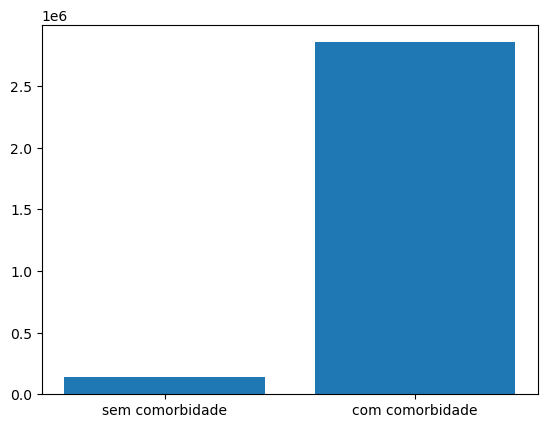

In [5]:
plt.bar(x=['sem comorbidade','com comorbidade'], height=[len(df_sem_comorbidade), len(df_com_comorbidade)])
print(f'sem comorbidade: {len(df_sem_comorbidade)}')
print(f'com comorbidade: {len(df_com_comorbidade)}')
plt.show()

In [6]:
# sample = np.random.choice(df_com_comorbidade.dropna().index, 136278)
# sample_df_com_comorbidade = df_com_comorbidade.loc[sample].reset_index(drop = True)
# plt.bar(x=['sem comorbidade','com comorbidade'], height=[len(df_sem_comorbidade), len(df_com_comorbidade)])
# print(f'sem comorbidade: {len(df_sem_comorbidade)}')
# print(f'com comorbidade: {len(sample_df_com_comorbidade)}')
# plt.show()

---
---

# Verificando Normalidade (Shapiro Wilk)

In [7]:
# Teste de Shapiro-Wilk
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality < 0.05:
        print("Rejeito H0 ---> Dados não possuem distribuição normal")
    else:
        print("Não Rejeito H0 ---> Dados possuem distribuição normal")

## Testando a Idade (Entre pessoas COM e SEM comorbidade)

H0: A distribuição seguem uma distribuição normal

H1: A distribuição NÃO seguem uma distribuição normal

In [8]:
check_normality(df_sem_comorbidade['idade'])
check_normality(df_com_comorbidade['idade'])

p value:1.0000
Não Rejeito H0 ---> Dados possuem distribuição normal
p value:1.0000
Não Rejeito H0 ---> Dados possuem distribuição normal


/home/andre/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


A idade de pessoas SEM comorbidade segue uma distribuição Normal

A idade de pessoas COM comorbidade segue uma distribuição Normal

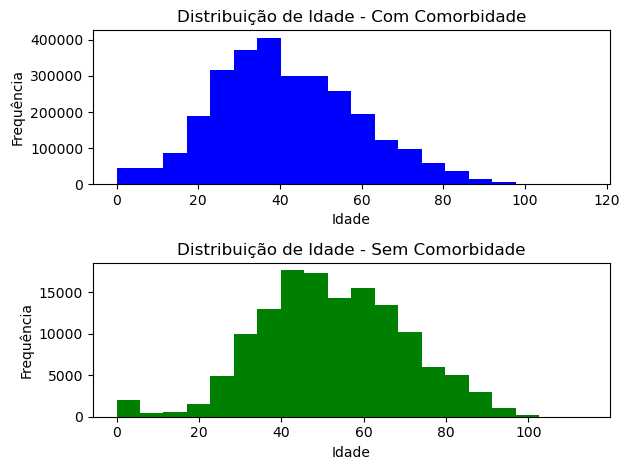

In [9]:
import matplotlib.pyplot as plt

# Supondo que as colunas 'idade' existem em ambos os dataframes

# Subplot para df_com_comorbidade
plt.subplot(2, 1, 1)  # 2 linhas, 1 coluna, plot 1
plt.hist(df_com_comorbidade['idade'], bins=20, color='blue')
plt.title('Distribuição de Idade - Com Comorbidade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Subplot para df_sem_comorbidade
plt.subplot(2, 1, 2)  # 2 linhas, 1 coluna, plot 2
plt.hist(df_sem_comorbidade['idade'], bins=20, color='green')
plt.title('Distribuição de Idade - Sem Comorbidade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Ajuste de layout para evitar sobreposição
plt.tight_layout()

# Exibição dos plots
plt.show()


---
---

# Teste para Variância (Levene’s test)

In [10]:
# Levene’s test
def check_variance_homogeneity(data1, data2):
    test_stat_var, p_value_var= stats.levene(data1.dropna(),data2.dropna())
    print("p value:%.4f" % p_value_var)
    if p_value_var < 0.05:
        print("Rejeita H0")
    else:
        print("Não rejeita H0")

Para as variâncias da idade das pessoas COM comorbidade ($\sigma_1$) e variância da idade das pessoas SEM comorbidade ($\sigma_2$)

H0: $\sigma_1 = \sigma_2$, A variância é igual para COM comorbidade e SEM comorbidade

H1: $\sigma_1 \neq \sigma_2$, A variância é diferente para COM comorbidadee SEM comorbidade

## Testando a idade

In [11]:
check_variance_homogeneity(df_sem_comorbidade['idade'], df_com_comorbidade['idade'])

p value:0.0000
Rejeita H0


A **variância da idade** de pessoas COM comorbidade é **DIFERENTE** das pessoas SEM comorbidade

---
---

# Teste para média (Mann–Whitney)

In [12]:
def test_media(data1, data2):
    ttest,p_value = stats.mannwhitneyu(data1.dropna(), data1.dropna(), alternative="two-sided")
    #print(data1.dropna().mean(), data2.dropna().mean())
    print("p value:%.8f" % p_value)
    if p_value < 0.05:
        print("Rejeita H0")
    else:
        print("Não rejeita H0")

## Testando a idade

Para as média da idade das pessoas COM comorbidade ($\mu_1$) e média da idade das pessoas SEM comorbidade ($\mu_2$)

H0: $\mu_1 = \mu_2$, A média é igual para COM e SEM comorbidade

H1: $\mu_1 \neq \mu_2$, A média é diferente para COM e SEM comorbidade

In [13]:
test_media(df_sem_comorbidade['idade'], df_com_comorbidade['idade'])

p value:1.00000000
Não rejeita H0


A **idade** de pessoas SEM comorbidade e COM comorbidade **tem a mesma média** para 95% de significancia

---
---

# Teste para dependencia de caracteristicas (Qui Quadrado)


H0: A variavel (A) é INDEPENDENTE da variável (B)

H1: A variavel (A) é DEPENDENTE da variável (B)

In [14]:
import pandas as pd
from scipy.stats import chi2_contingency

# Comorbidades
df_subset = df_com_comorbidade[['obito', 'asma', 'cardiopatia', 'diabetes', 'doenca_hematologica',
                                'doenca_hepatica', 'doenca_neurologica', 'doenca_renal',
                                'imunodepressao', 'obesidade', 'pneumopatia', 'puerpera', 'sindrome_de_down']]

df_subset = df_subset.fillna(0) # Substitua os valores NaN por 0
results = []

# Para cada comorbidade
for comorbidade in df_subset.columns[1:]:
    # Tabela contigencia
    contingency_table = pd.crosstab(df_subset['obito'], df_subset[comorbidade])

    # Test qui-quadrado
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Resultado
    results.append({'Comorbidade': comorbidade, 'Chi2': chi2, 'P-value': p})

# Resultado
results_df = pd.DataFrame(results).sort_values(by='Chi2', ascending=False).reset_index(drop=True)
results_df

,Comorbidade,Chi2,P-value
0,doenca_renal,737352.849560,0.0
1,imunodepressao,731057.913355,0.0
2,diabetes,594872.328419,0.0
3,cardiopatia,521211.073742,0.0
4,doenca_neurologica,480225.044594,0.0
5,pneumopatia,468470.396507,0.0
6,obesidade,463607.034943,0.0
7,doenca_hepatica,449854.016269,0.0
8,doenca_hematologica,448379.264459,0.0
9,asma,447083.779511,0.0


Os resultados indicam que, para cada uma das comorbidades listadas, o teste qui-quadrado de independência gerou um valor muito alto para a estatística qui-quadrado um valor-p extremamente baixo (próximo a zero). Isso sugere fortemente a rejeição da hipótese nula de independência entre a presença da comorbidade e a variável de óbito.

Em termos práticos, isso significa que há uma associação significativa entre cada uma das comorbidades (asma, cardiopatia, diabetes, doença hematológica, doença hepática, doença neurológica, doença renal, imunodepressão, obesidade, pneumopatia, puerpera, síndrome de Down) e a ocorrência de óbito. O valor-p próximo de zero sugere que a probabilidade de os resultados observados ocorrerem por acaso, assumindo independência, é muito baixa.


**Importante:** O resultado está ordenado por maior estatísitca Qui-Quadrado, indicando que a característica possuí maior influência no óbito

# Teste T

## Pessoas com comorbidade, testando COM óbito e SEM óbito

A média da idade das pessoas que TIVERAM obito ($\mu_1$) e a média das pessoas que NÃO tiveram óbito ($\mu_2$)

H0: $\mu_1 = \mu_2$, A média é igual para COM e SEM óbito

H1: $\mu_1 \neq \mu_2$, A média é diferente para COM e SEM óbito

In [15]:
from scipy.stats import ttest_ind

# Subconjunto de dados relevantes
df_subset_idade = df_com_comorbidade[['obito', 'idade']].dropna()

# Divida os dados em dois grupos: óbito e não óbito
grupo_obito = df_subset_idade[df_subset_idade['obito'] == True]['idade']
grupo_nao_obito = df_subset_idade[df_subset_idade['obito'] == False]['idade']

# Realize o teste t de Student
t_statistic, p_value = ttest_ind(grupo_obito, grupo_nao_obito)

# Exiba os resultados
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interprete os resultados
alpha = 0.05
if p_value < alpha:
    print("A hipótese nula de que não há diferença significativa na idade entre os grupos é rejeitada.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. A idade pode não ser significativamente diferente entre os grupos.")


T-Statistic: 483.0209275172298
P-Value: 0.0
A hipótese nula de que não há diferença significativa na idade entre os grupos é rejeitada.


Como resultado, temos que a **idade têm influência no  váriavel óbito** para pessoas com comorbidade

## Pessoas sem comorbidade, testando COM óbito e SEM óbito

A média da idade das pessoas que TIVERAM obito ($\mu_1$) e a média das pessoas que NÃO tiveram óbito ($\mu_2$)

H0: $\mu_1 = \mu_2$, A média é igual para COM e SEM óbito

H1: $\mu_1 \neq \mu_2$, A média é diferente para COM e SEM óbito

In [16]:
from scipy.stats import ttest_ind

# Subconjunto de dados relevantes
df_subset_idade = df_sem_comorbidade[['obito', 'idade']].dropna()

# Divida os dados em dois grupos: óbito e não óbito
grupo_obito = df_subset_idade[df_subset_idade['obito'] == True]['idade']
grupo_nao_obito = df_subset_idade[df_subset_idade['obito'] == False]['idade']

# Realize o teste t de Student
t_statistic, p_value = ttest_ind(grupo_obito, grupo_nao_obito)

# Exiba os resultados
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interprete os resultados
alpha = 0.05
if p_value < alpha:
    print("A hipótese nula de que não há diferença significativa na idade entre os grupos é rejeitada.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. A idade pode não ser significativamente diferente entre os grupos.")


T-Statistic: 134.70191407297727
P-Value: 0.0
A hipótese nula de que não há diferença significativa na idade entre os grupos é rejeitada.


Como resultado, temos que a **idade têm influência no  váriavel óbito** para pessoas sem comorbidade.

## Amostra com todos dados, testando COM óbito e SEM óbito

A média da idade das pessoas que TIVERAM obito ($\mu_1$) e a média das pessoas que NÃO tiveram óbito ($\mu_2$)

H0: $\mu_1 = \mu_2$, A média é igual para COM e SEM óbito

H1: $\mu_1 \neq \mu_2$, A média é diferente para COM e SEM óbito

In [17]:
from scipy.stats import ttest_ind

# Subconjunto de dados relevantes
df_subset_idade = df[['obito', 'idade']].dropna()

# Divida os dados em dois grupos: óbito e não óbito
grupo_obito = df_subset_idade[df_subset_idade['obito'] == True]['idade']
grupo_nao_obito = df_subset_idade[df_subset_idade['obito'] == False]['idade']

# Realize o teste t de Student
t_statistic, p_value = ttest_ind(grupo_obito, grupo_nao_obito)

# Exiba os resultados
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interprete os resultados
alpha = 0.05
if p_value < alpha:
    print("A hipótese nula de que não há diferença significativa na idade entre os grupos é rejeitada.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. A idade pode não ser significativamente diferente entre os grupos.")

T-Statistic: 483.0209275172298
P-Value: 0.0
A hipótese nula de que não há diferença significativa na idade entre os grupos é rejeitada.


Como resultado, temos que a **idade têm influência no  váriavel óbito**.

- Faixa Etaria
- Sexo

#

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def gera_piramide_etaria(data):
    contagem_idade_homens = [x for x in (data.loc[data['cs_sexo'] == 'masculino', 'idade']//5).value_counts().sort_index(ascending=False)]
    contagem_idade_mulheres = [x for x in (data.loc[data['cs_sexo'] == 'feminino', 'idade']//5).value_counts().sort_index(ascending=False)]

    # Valores Maximos
    max_len = max(len(contagem_idade_homens), len(contagem_idade_mulheres))
    contagem_idade_homens.extend([0] * (max_len - len(contagem_idade_homens)))
    contagem_idade_mulheres.extend([0] * (max_len - len(contagem_idade_mulheres)))

    # Criar faixas etárias
    faixas_etarias = np.flip([str(i*5) + '-' + str((i+1)*5-1) for i in range(max_len)])

    # Plotar a pirâmide etária
    fig, ax = plt.subplots()

    # Homens à esquerda
    ax.barh(faixas_etarias, contagem_idade_homens, color='blue', label='Homens')

    # Mulheres à direita
    ax.barh(faixas_etarias, [-x for x in contagem_idade_mulheres], color='orange', label='Mulheres')

    # Ajustes estéticos
    ax.set_xlabel('Número de Pessoas')
    ax.set_ylabel('Faixa Etária')
    ax.set_title('Pirâmide Etária')
    ax.legend()
    max_value = max(max(contagem_idade_homens), max(contagem_idade_mulheres))
    ax.set_xlim(-max_value, max_value)

    # Inverter eixo y para ter a faixa etária mais jovem na parte inferior
    ax.invert_yaxis()
    plt.show()

In [19]:
from scipy.stats import ttest_ind

def compara_genero(data):
    # Subconjunto de dados relevantes
    df_subset_idade = data[['idade', 'cs_sexo']].dropna()

    # Divida os dados em dois grupos: óbito e não óbito
    grupo1 = df_subset_idade[df_subset_idade['cs_sexo'] == 'masculino']['idade']
    grupo2 = df_subset_idade[df_subset_idade['cs_sexo'] == 'feminino']['idade']

    # Realize o teste t de Student
    t_statistic, p_value = ttest_ind(grupo1, grupo2)

    # Exiba os resultados
    print(f"T-Statistic: {t_statistic}")
    print(f"P-Value: {p_value}")

    # Interprete os resultados
    alpha = 0.05
    if p_value < alpha:
        print("ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.")
    else:
        print("REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.")

# Todos os dados

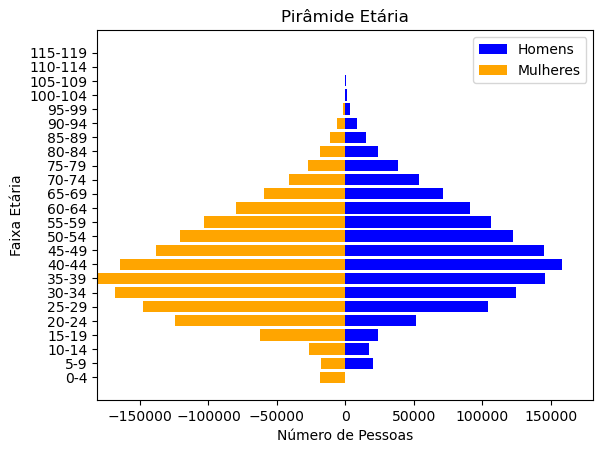

In [20]:
gera_piramide_etaria(df)

# Asma

### Asma todos dados

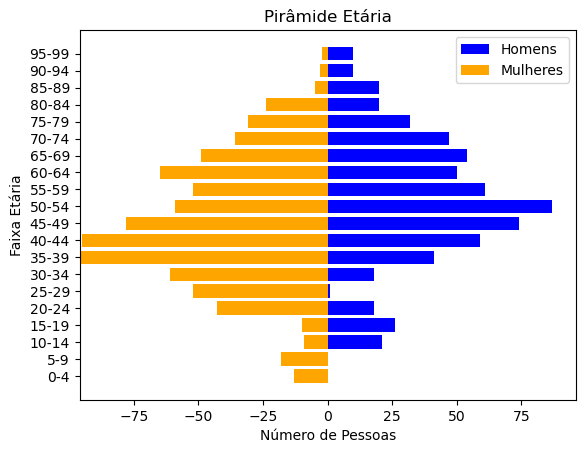

T-Statistic: -2.3811107564569505
P-Value: 0.017389163316260184
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.


In [21]:
condicao_comorbidade = (
    ((df['asma'] >= 1)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Asma Óbito

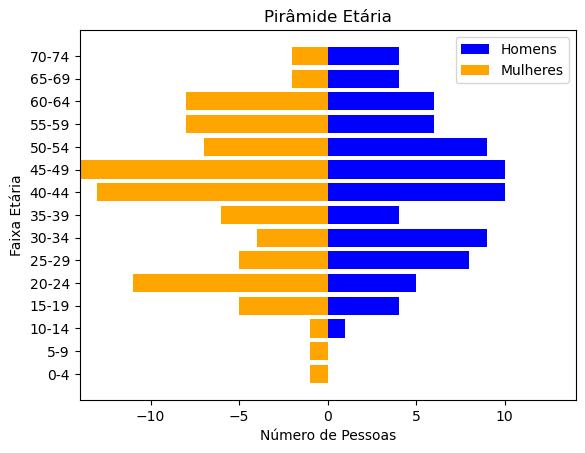

T-Statistic: -1.2491611316363045
P-Value: 0.21336471727764159
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [22]:
condicao_comorbidade = (
    (df['obito'] == True) &
    ((df['asma'] >= 1)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Asma Não óbito

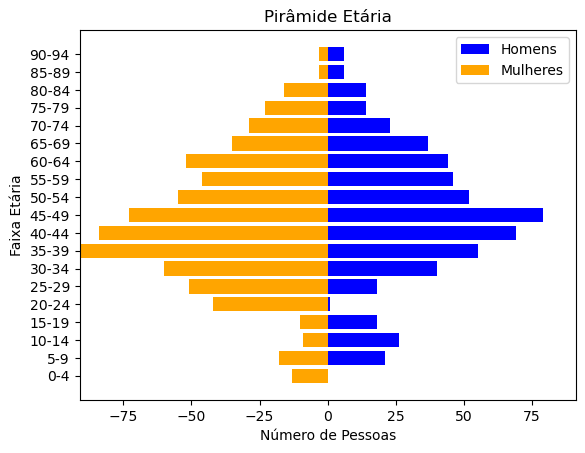

T-Statistic: -2.4451650420328526
P-Value: 0.014612615537233031
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.


In [23]:
condicao_comorbidade = (
    (df['obito'] == False) &
    ((df['asma'] >= 1)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

# Diabetes

### Diabetes todos dados

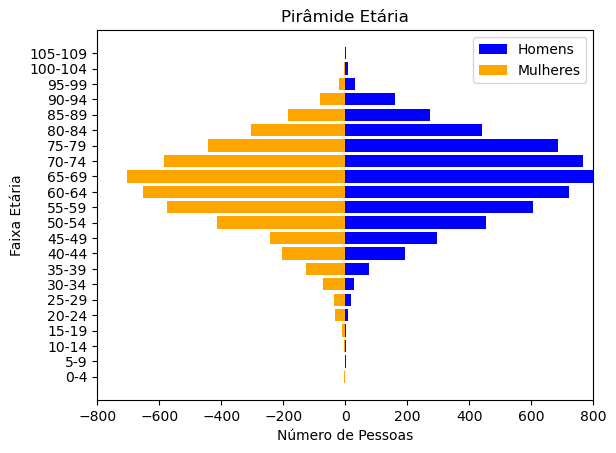

T-Statistic: -7.400732554401492
P-Value: 1.4603718329744568e-13
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.


In [24]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'] >= 1)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Diabetes óbito

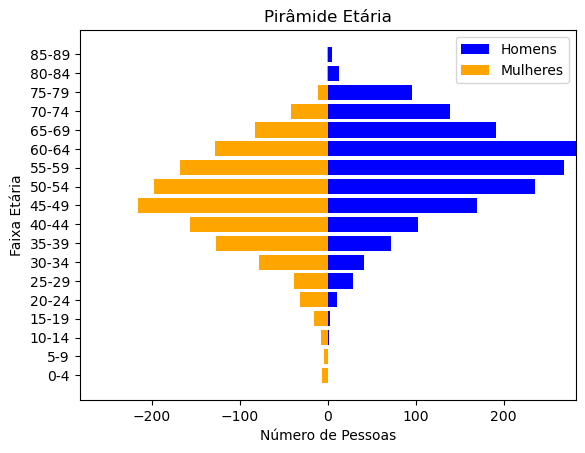

T-Statistic: -3.660885380708058
P-Value: 0.00025572148133149884
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.


In [25]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'] >= 1)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Diabetes não óbito

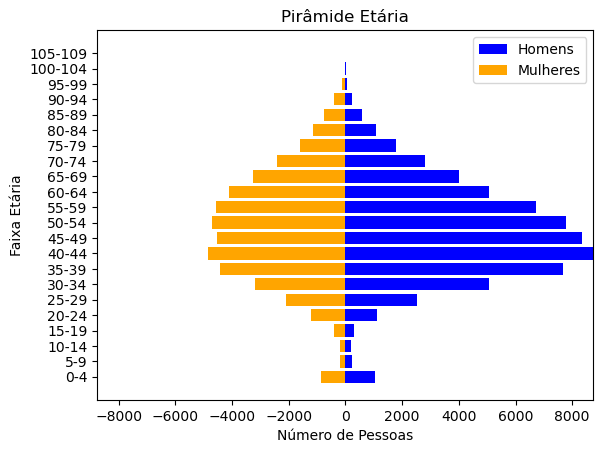

T-Statistic: -14.204534938444535
P-Value: 9.424321792597845e-46
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.


In [26]:
condicao_comorbidade = (
    (df['obito'] == False) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() >= 1)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

# Doenca Hematologica

### Doenca Hematologica todos dados

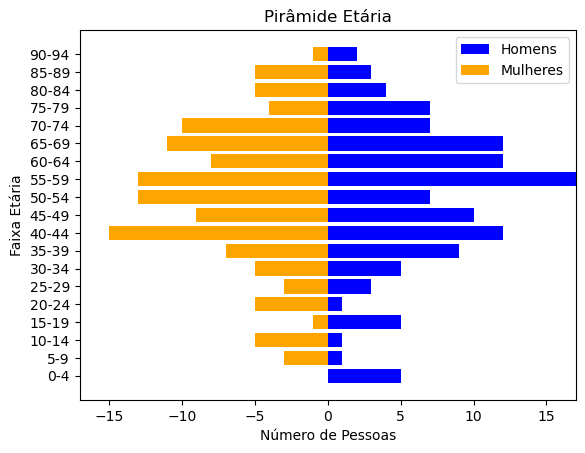

T-Statistic: -0.10567576061847735
P-Value: 0.9159264365757727
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [27]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'] >= 1)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Doenca Hematologica óbito

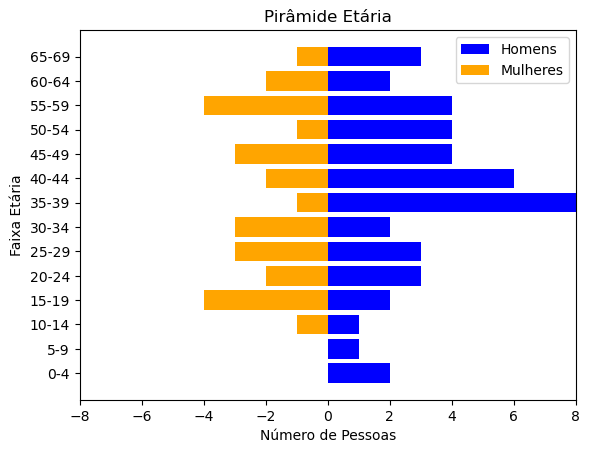

T-Statistic: -1.0424311026002502
P-Value: 0.3007987414553294
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [28]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'] >= 1)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

###  Doenca Hematologica não óbito

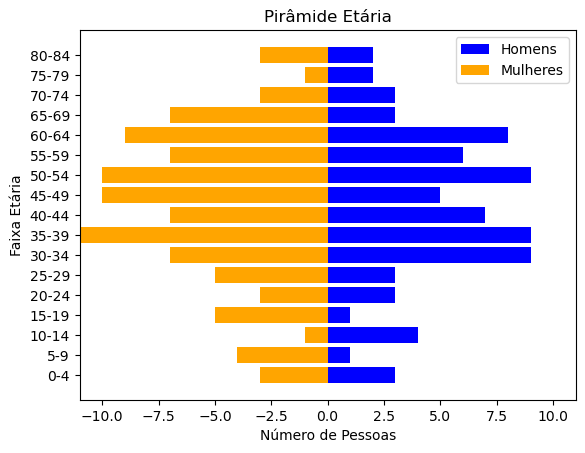

T-Statistic: -0.16387288088725277
P-Value: 0.8700236195430633
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [29]:
condicao_comorbidade = (
    (df['obito'] == False) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'] >= 1)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

# Cardiopatia

### Cardiopatia todos dados

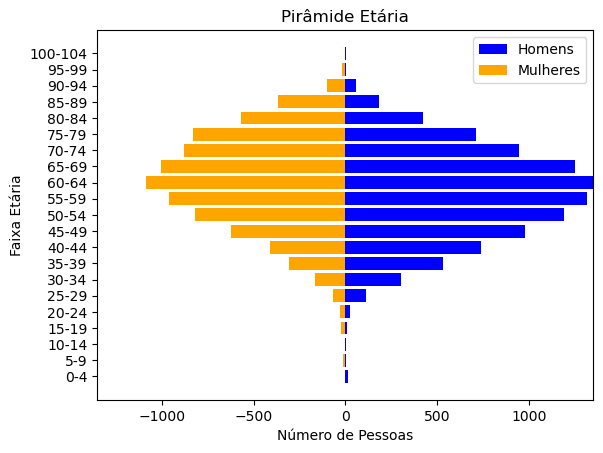

T-Statistic: -17.289651989094406
P-Value: 1.878861146126562e-66
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.


In [30]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'] >= 1)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Cardiopatia óbito

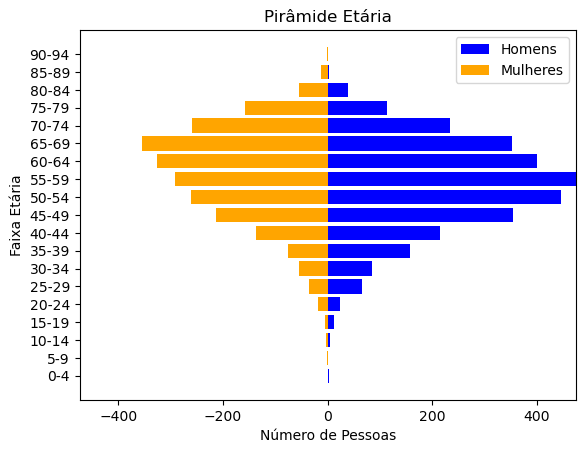

T-Statistic: -9.472407581325227
P-Value: 4.0289255158446286e-21
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.


In [31]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'] >= 1)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Cardiopatia não óbito

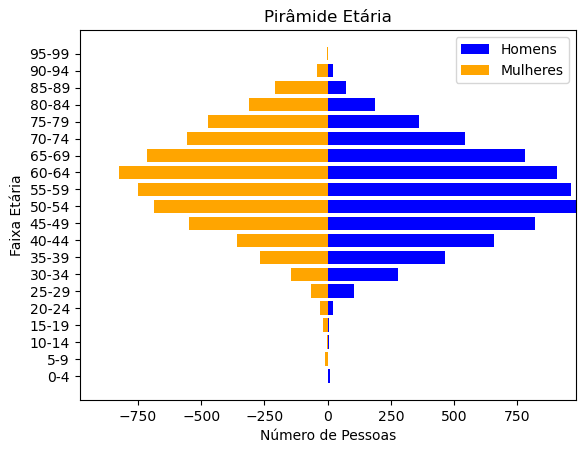

T-Statistic: -16.323706371595186
P-Value: 2.5466889997580403e-59
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.


In [32]:
condicao_comorbidade = (
    (df['obito'] == False) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'] >= 1)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

# Doenca Hepatica

### Doenca Hepatica Todos dados

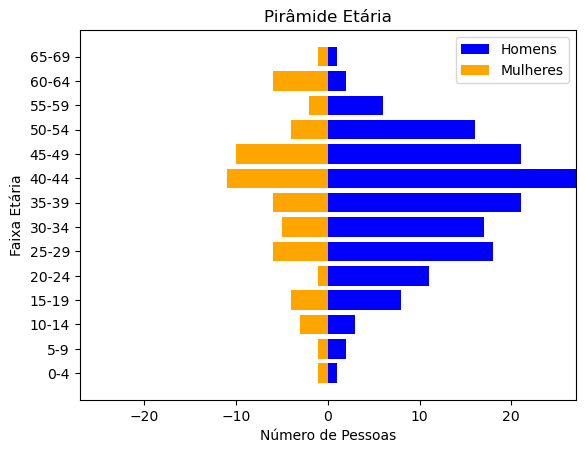

T-Statistic: -0.6532747214332083
P-Value: 0.514283731938395
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [33]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'] >= 1)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Doenca Hepatica óbito

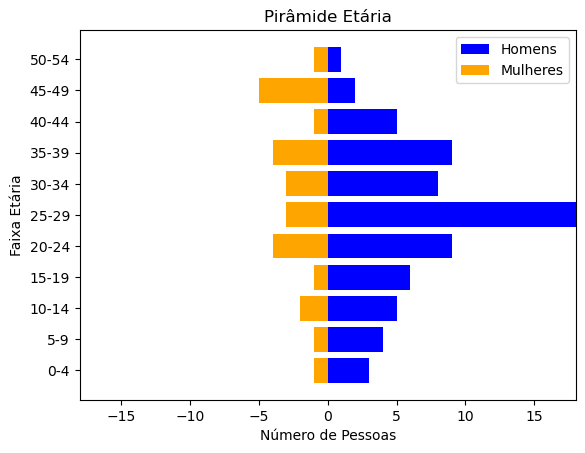

T-Statistic: -1.4803304972084934
P-Value: 0.14212904631324844
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [34]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'] >= 1)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Doenca Hepatica óbito

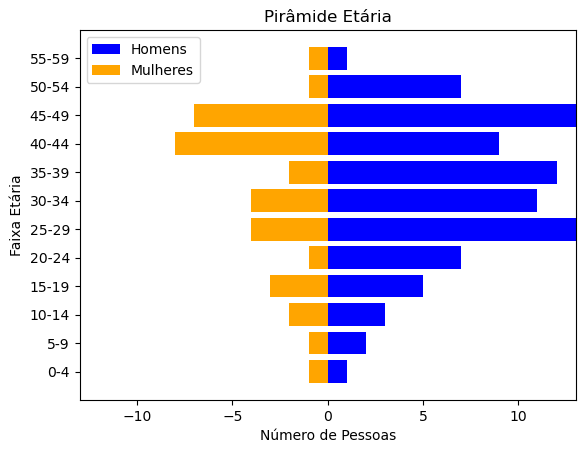

T-Statistic: 0.13667355000778597
P-Value: 0.8915237383736422
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [35]:
condicao_comorbidade = (
    (df['obito'] == False) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'] >= 1)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

# Doenca Neurologica

### Doenca Neurologica todos dados

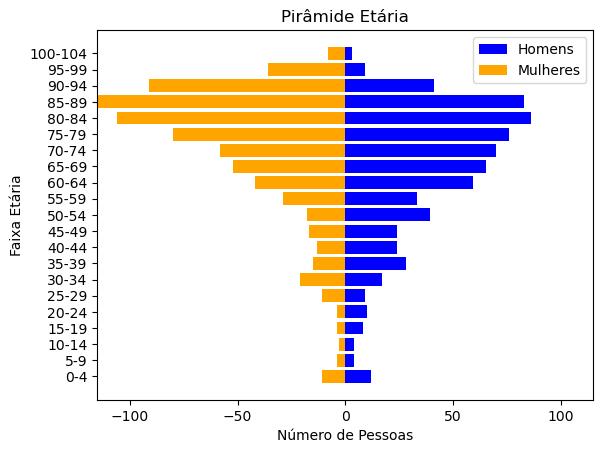

T-Statistic: -5.826180926276178
P-Value: 6.985428943235748e-09
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.


In [36]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'] >= 1)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Doenca Neurologica óbito

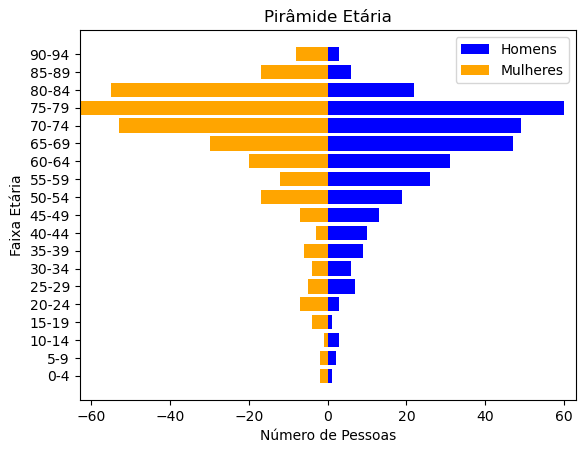

T-Statistic: -3.0062439761250563
P-Value: 0.002749888759865031
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.


In [37]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'] >= 1)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Doenca Neurologica não óbito

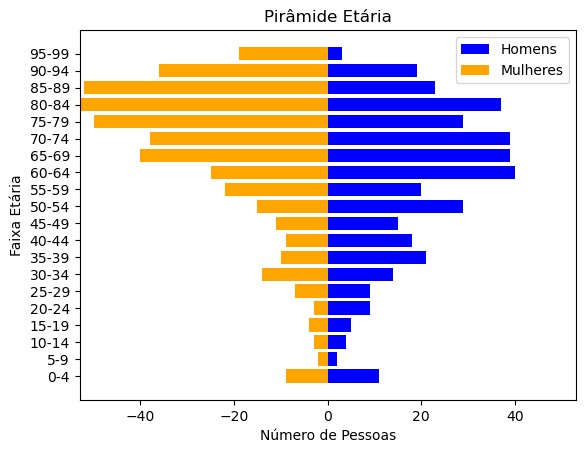

T-Statistic: -5.573886567397258
P-Value: 3.398497583075734e-08
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.


In [38]:
condicao_comorbidade = (
    (df['obito'] == False) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'] >= 1)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

# Doenca Renal

### Doenca Renal todos dados

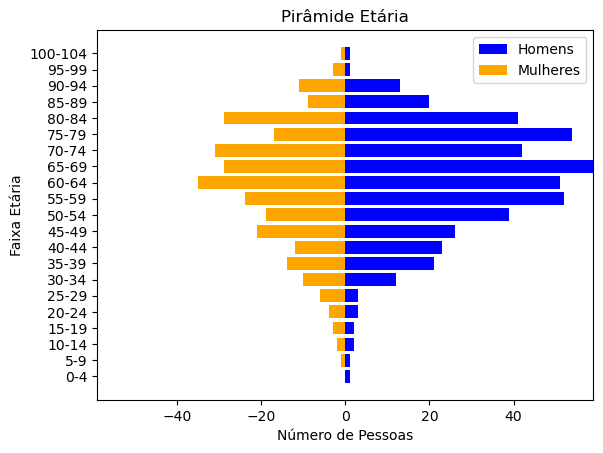

T-Statistic: 1.087939523059766
P-Value: 0.27697316528231436
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [39]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'] >= 1)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Doenca Renal óbito

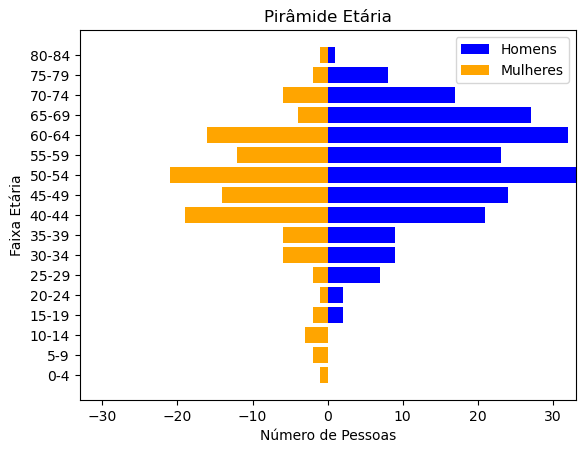

T-Statistic: 0.19599098556810673
P-Value: 0.8447374889784123
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [40]:
condicao_comorbidade = (
    (df['obito'] == True) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'] >= 1)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Doenca Renal não óbito

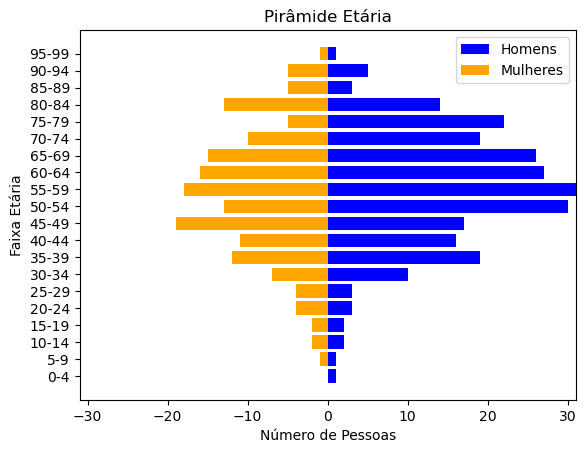

T-Statistic: 0.7956752242323172
P-Value: 0.42667790038696174
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [41]:
condicao_comorbidade = (
    (df['obito'] == False) & 
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'] >= 1)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

# Imunodepressao

### Imunodepressao todos dados

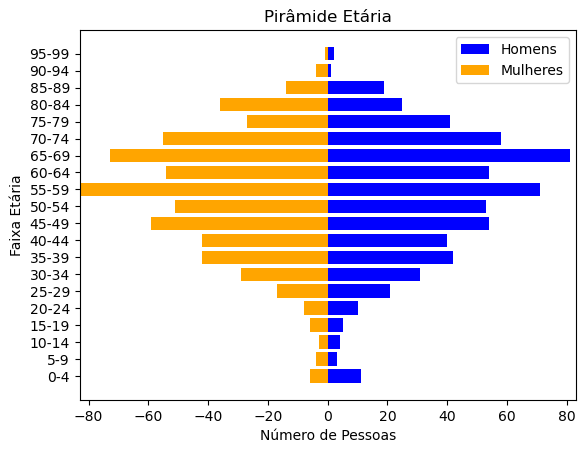

T-Statistic: -0.1003509741197952
P-Value: 0.9200819382659489
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [42]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'] >= 1)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Imunodepressao óbito

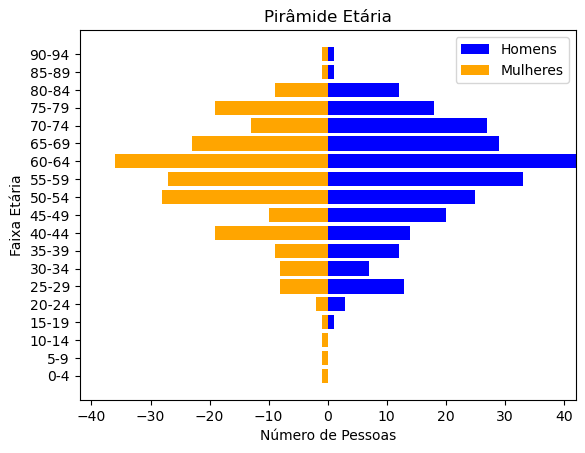

T-Statistic: 0.8993382695742808
P-Value: 0.368930114895355
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [43]:
condicao_comorbidade = (
    (df['obito']== True) &
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'] >= 1)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Imunodepressao não óbito

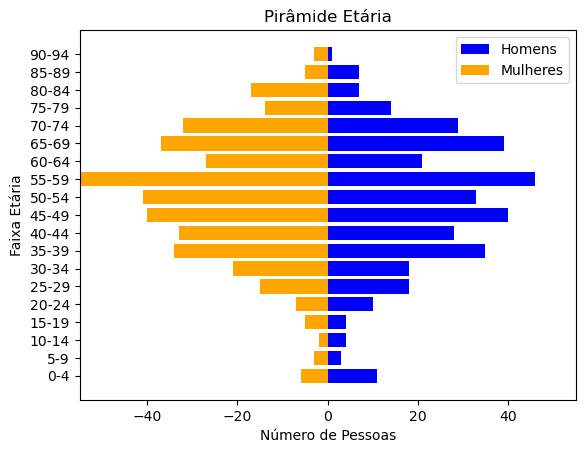

T-Statistic: -1.4784582133109725
P-Value: 0.13969786006865356
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [44]:
condicao_comorbidade = (
    (df['obito']== False) &
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'] >= 1)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

# Obesidade

### Obesidade todos dados

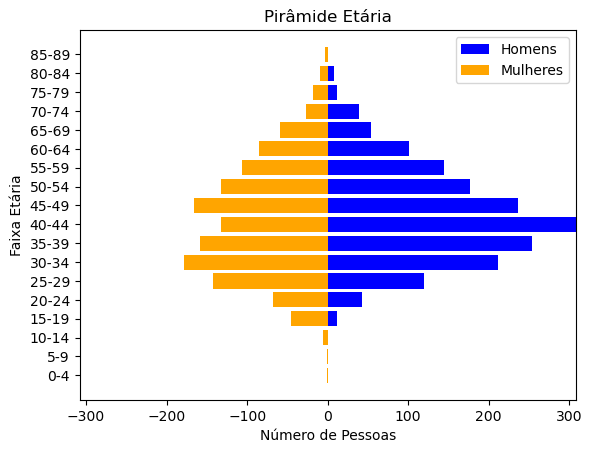

T-Statistic: -7.527799163071348
P-Value: 6.748044847679695e-14
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.


In [45]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'] >= 1)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

###  Obesidade óbito

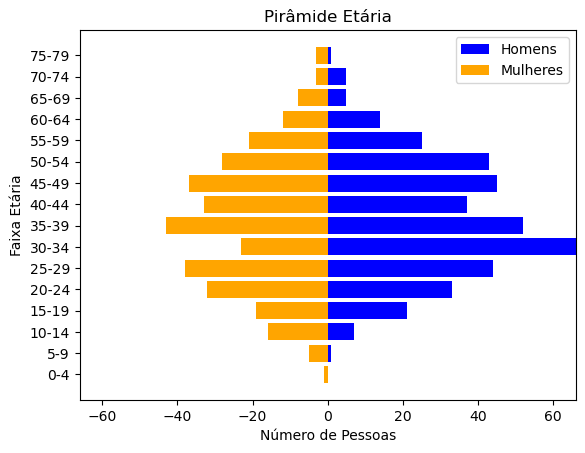

T-Statistic: -3.7133904202215824
P-Value: 0.00022033201247613582
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.


In [46]:
condicao_comorbidade = (
    (df['obito']== True) &
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'] >= 1)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Obesidade não óbito

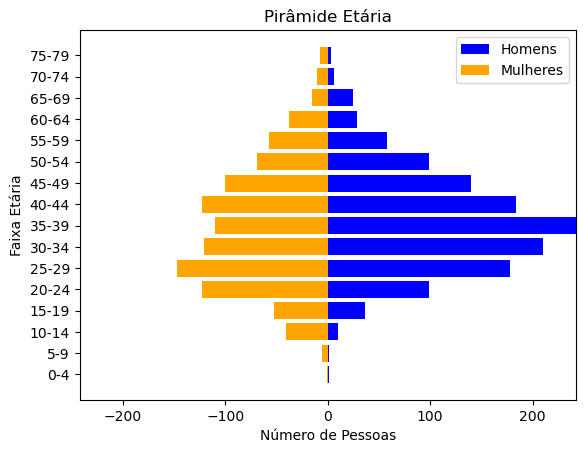

T-Statistic: -6.585520893814085
P-Value: 5.579217233635682e-11
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.


In [47]:
condicao_comorbidade = (
    (df['obito']== False) &
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'] >= 1)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

# Pneumopatia

### Pneumopatia todos dados

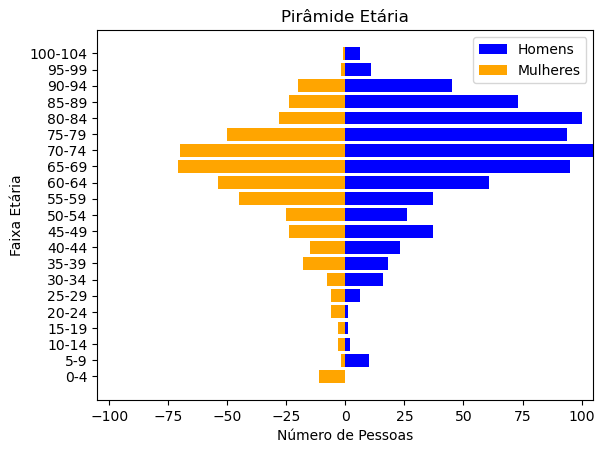

T-Statistic: 1.3171179836789089
P-Value: 0.18804027889580743
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [48]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'] >= 1)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Pneumopatia óbito

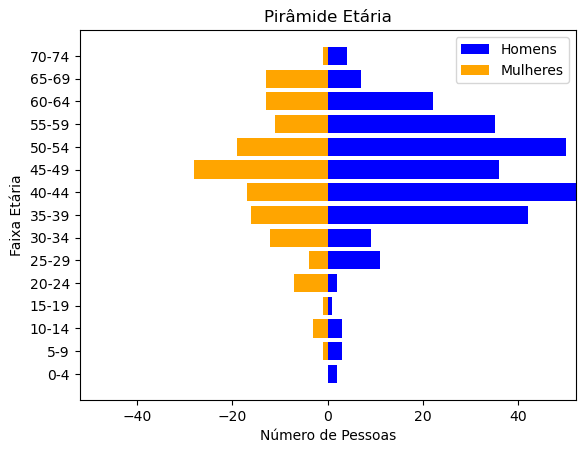

T-Statistic: 0.23963614632279295
P-Value: 0.8107284151212075
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [49]:
condicao_comorbidade = (
    (df['obito']== True) &
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'] >=1 )) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

 ### Pneumopatia não óbito

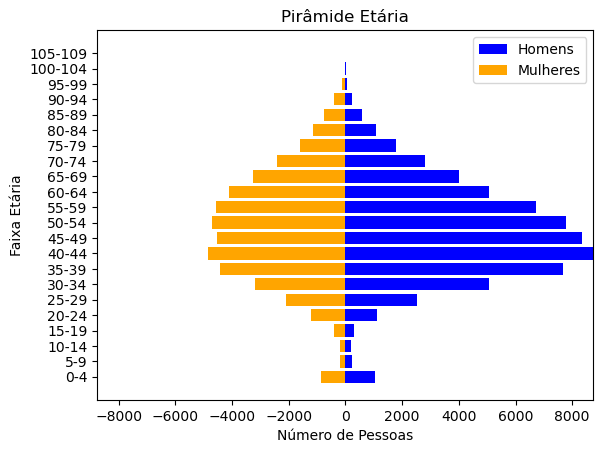

T-Statistic: -14.204534938444535
P-Value: 9.424321792597845e-46
ACEITA hipotese nula: não há diferença significativa da média de idade entre gêneros.


In [50]:
condicao_comorbidade = (
    (df['obito']== False) &
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() >=1)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'].isna() == True) | (df['sindrome_de_down'] == None))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

# Sindrome de down

### Sindrome de down todos dados

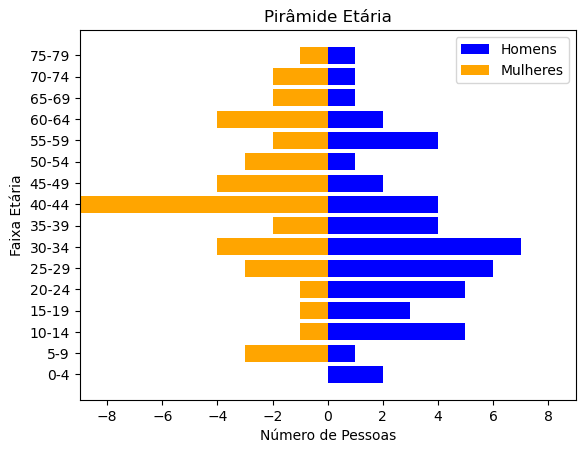

T-Statistic: -0.9801880586146635
P-Value: 0.3296502888166265
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [51]:
condicao_comorbidade = (
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'] >= 1))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Sindrome de down óbito

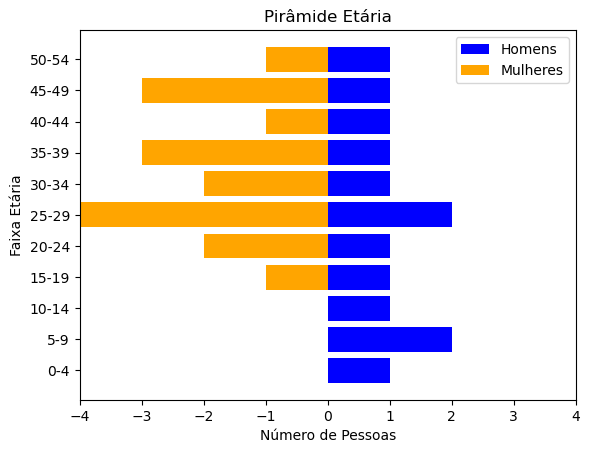

T-Statistic: -0.15962658826312554
P-Value: 0.8743211659783161
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [52]:
condicao_comorbidade = (
    (df['obito']== True) &
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'] >= 1))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])

### Sindrome de down não óbito

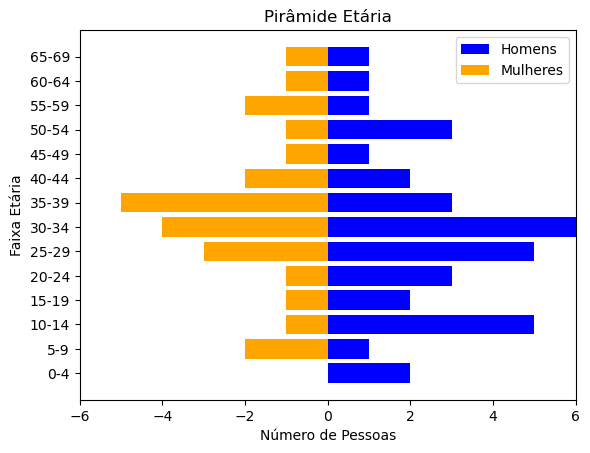

T-Statistic: -0.6803705851423762
P-Value: 0.4989311181518381
REJEITA hipótese nula: pode haver diferença significativa da média de idade entre gêneros.


In [53]:
condicao_comorbidade = (
    (df['obito']== False) &
    ((df['asma'].isna() == True) | (df['asma'] == None)) &
    ((df['cardiopatia'].isna() == True) | (df['cardiopatia'] == None)) &
    ((df['diabetes'].isna() == True) | (df['diabetes'] == None)) &
    ((df['doenca_hematologica'].isna() == True) | (df['doenca_hematologica'] == None)) &
    ((df['doenca_hepatica'].isna() == True) | (df['doenca_hepatica'] == None)) &
    ((df['doenca_neurologica'].isna() == True) | (df['doenca_neurologica'] == None)) &
    ((df['doenca_renal'].isna() == True) | (df['doenca_renal'] == None)) &
    ((df['imunodepressao'].isna() == True) | (df['imunodepressao'] == None)) &
    ((df['obesidade'].isna() == True) | (df['obesidade'] == None)) &
    ((df['pneumopatia'].isna() == True) | (df['pneumopatia'] == None)) &
    ((df['puerpera'].isna() == True) | (df['puerpera'] == None)) &
    ((df['sindrome_de_down'] >= 1))
)
gera_piramide_etaria(df[condicao_comorbidade])
compara_genero(df[condicao_comorbidade])